In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Experiment names and their random checkpoints for various topologies


# scrl:
#### fix: LM_esn_iscrl_fix_rscrl_fix_tanh_L2_norm0_r03: ckpt-00165100
#### learn: LM_esn_iscrl_lr_rscrl_lr_tanh_L2_norm0_r04: ckpt-00157700

# scrbd:
#### fix: LM_esn_iscrbd_fix_rscrbd_fix_tanh_L2_norm0_r11: ckpt-00162800
#### learn: LM_esn_iscrbd_lr_rscrbd_lr_tanh_L2_norm0_r12: ckpt-00157200

# rotation:
#### fix: LM_esn_irot_lr_rrot_lr_tanh_L2_norm0_rr20: ckpt-00156600
#### learn: LM_esn_irot_fix_rrot_fix_tanh_L2_norm0_rr19: ckpt-00164900


# random:
#### fix: LM_esn_rand3N_fix_R2048_tanh_L2_norm0_r26: ckpt-00164900
#### fix: LM_esn_randN_fix_R2048_tanh_L2_norm0_r25: ckpt-00167800
#### learn: LM_esn_rand3N_lr_R2048_tanh_L2_norm0_r29: ckpt-00159100
#### learn: LM_esn_randN_lr_R2048_tanh_L2_norm0_r28: ckpt-00159600


In [ ]:
ckpt_base_dir = "/cns/vz-d/home/harshx/brain/rs=6.3/"

exp_name="LM_esn_rand3N_fix_R2048_tanh_L2_norm0_r26"
ckpt="ckpt-00159100"

ckpt_path = os.path.join(ckpt_base_dir, exp_name, "train", ckpt)
def get_all_vars():
  all_vars = tf.train.list_variables(ckpt_path)
  var_names = set([x[0] for x in all_vars])
  for var_name in var_names:
    print(var_name)

get_all_vars()

1bwds_lm/lm/rnns_1/fcn/w/var/Adam
1bwds_lm/lm/rnns_1/fc1/w/var/Adam
1bwds_lm/lm/rnns_1/wr_mask/var
1bwds_lm/lm/rnns_1/fcn/w/var/Adam_1
1bwds_lm/lm/rnns_0/fc1/w/var
1bwds_lm/lm/rnns_0/win_mask/var
1bwds_lm/lm/rnns_0/fc1/w/var/Adam
1bwds_lm/lm/rnns_1/fcn/b/var
1bwds_lm/lm/softmax/bias_0/var/Adam
1bwds_lm/lm/rnns_0/scale/var/Adam_1
1bwds_lm/gradient_norm_tracker/log_mean_squared/var
1bwds_lm/lm/softmax/weight_0/var
1bwds_lm/lm/softmax/weight_0/var/Adam
1bwds_lm/lm/rnns_0/fcn/w/var/Adam_1
1bwds_lm/gradient_norm_tracker/total_rejections/var
1bwds_lm/lm/rnns_1/fcn/b/var/Adam
1bwds_lm/lm/rnns_1/fcn/w/var
1bwds_lm/lm/softmax/weight_0/var/Adam_1
1bwds_lm/lm/rnns_0/scale/var/Adam
1bwds_lm/lm/rnns_0/win/var/Adam
1bwds_lm/lm/softmax/bias_0/var
1bwds_lm/lm/rnns_1/radius/var/Adam
1bwds_lm/lm/rnns_1/radius/var
beta1_power
1bwds_lm/lm/rnns_1/fc1/b/var/Adam
1bwds_lm/lm/rnns_0/fcn/b/var/Adam
1bwds_lm/lm/rnns_0/fcn/b/var
1bwds_lm/lm/rnns_0/scale/var
1bwds_lm/lm/rnns_0/win/var/Adam_1
1bwds_lm/gradient_nor

## Analysing the Spectral distribution of RNN reservoir Weights

=============random fixed=============
shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  1.9526674


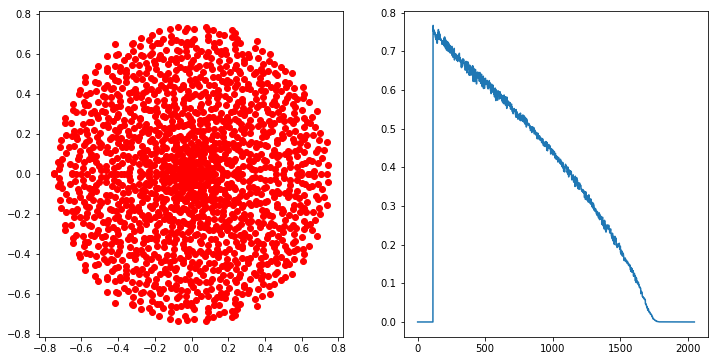

shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  2.356951


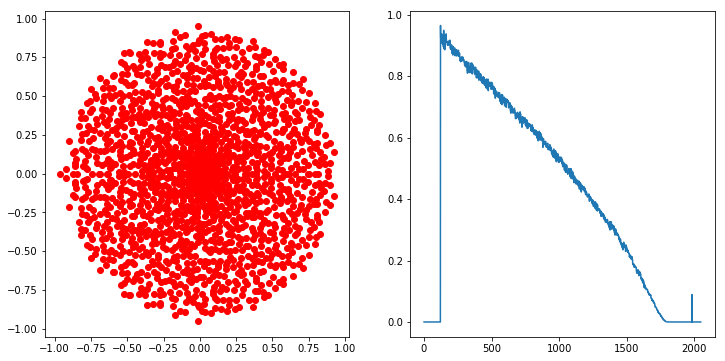

=============random learnt=============
shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  1.323403


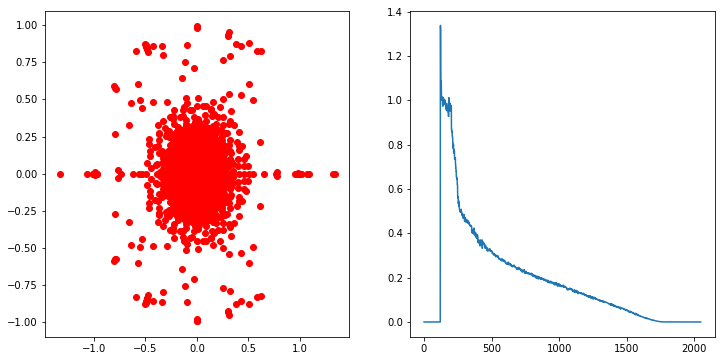

shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  2.0038435


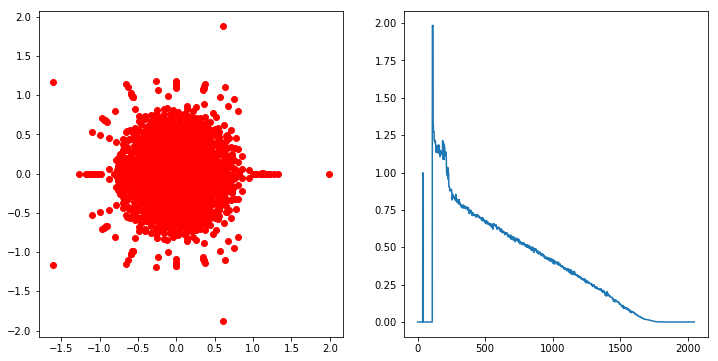

=============scrl fixed=============
shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  2.4590418


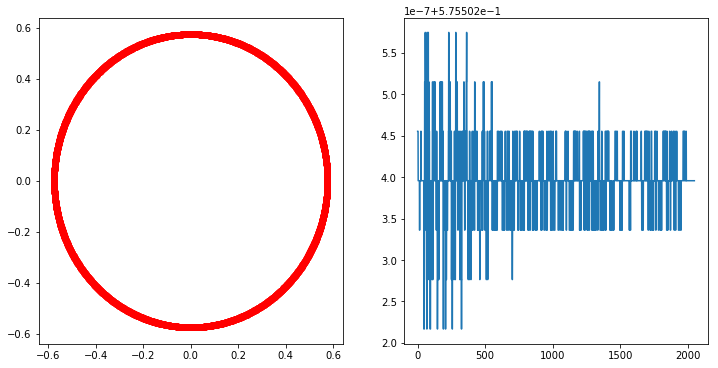

shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  2.8548548


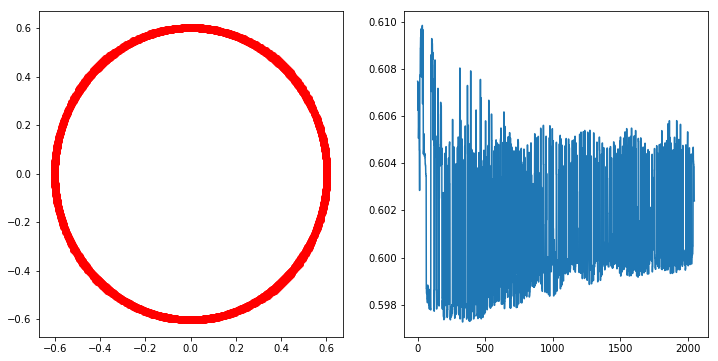

=============scrl learnt=============
shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  2.020149


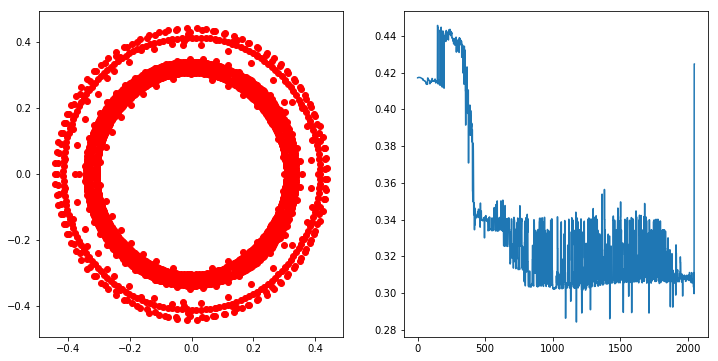

shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  2.8663607


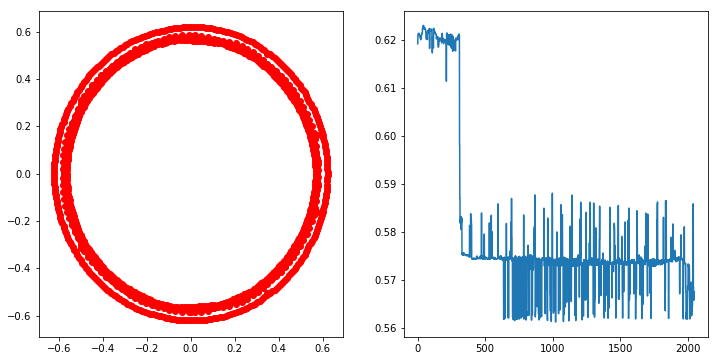

=============scrbd fixed=============
shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  1.5842144


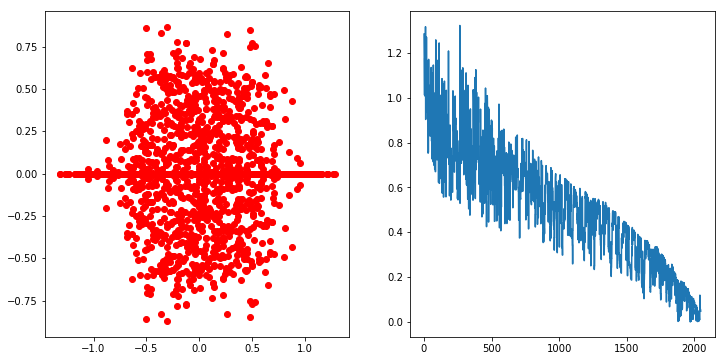

shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  1.7512982


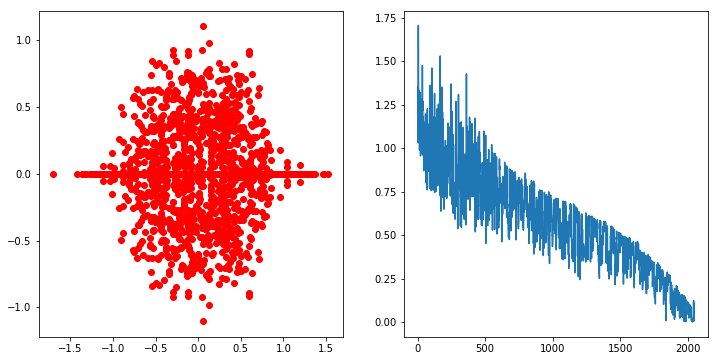

=============scrbd learnt=============
shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  1.1126114


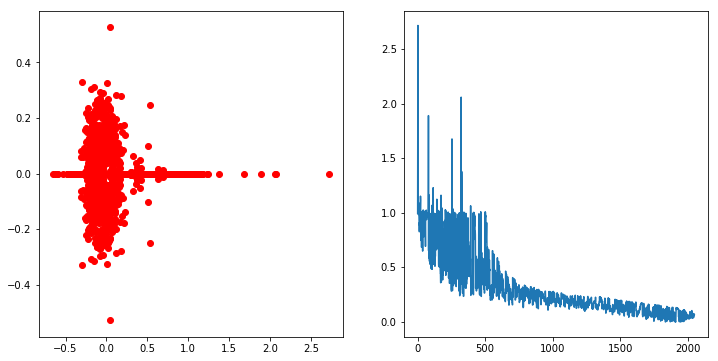

shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  1.953008


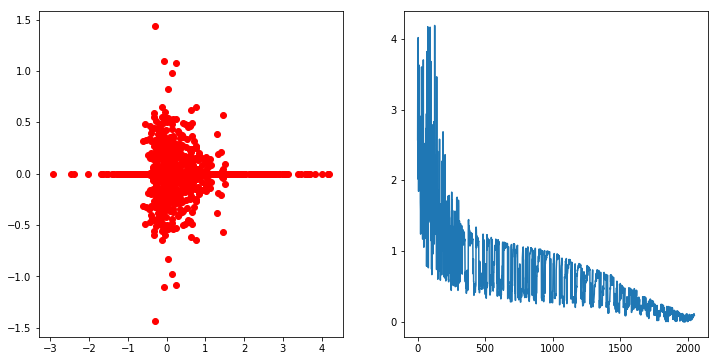

=============rot fixed=============
shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  1.3665965


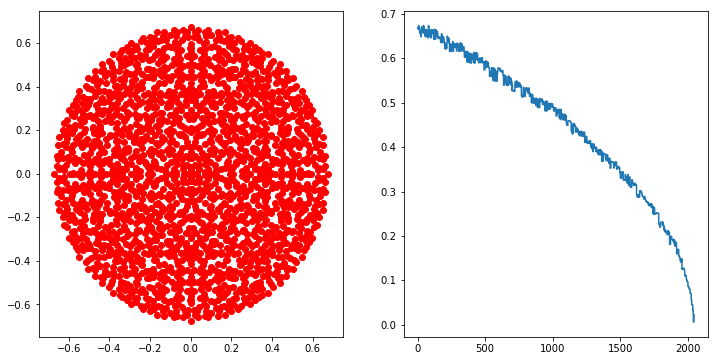

shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  2.0071952


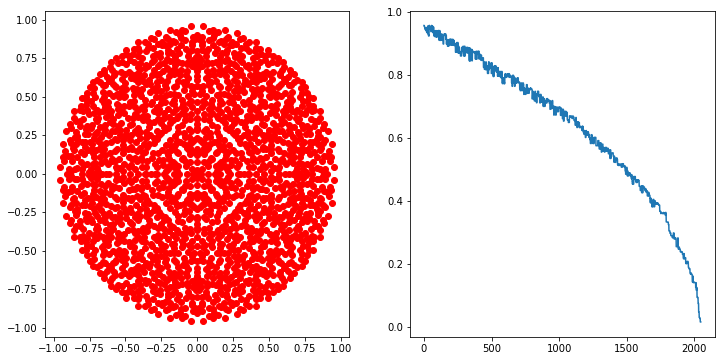

=============rot learnt=============
shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  0.7788252


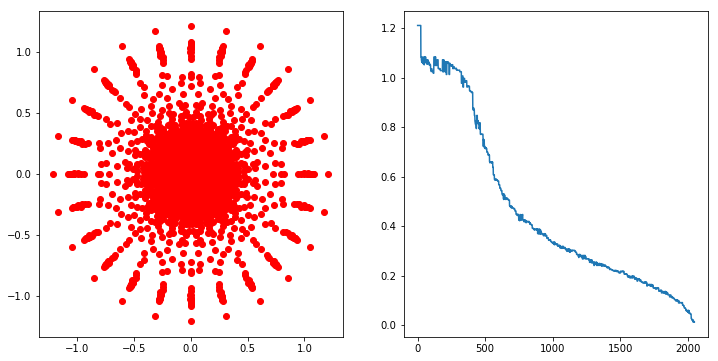

shape of weight:  (2048, 2048)
shape of scale:  ()
Value of scale:  1.368619


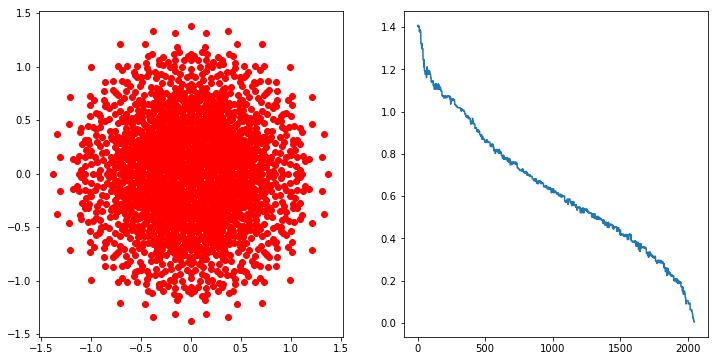

In [ ]:
# def get_eigvals(weight):
#   eigvals, eigvecs = np.linalg.eig(weight)
#   return eigvals


def plot_eigvals(eigvals, as_complex=True):
  f = plt.figure(figsize=(12,6))
  ax = f.add_subplot(121)
  ax2 = f.add_subplot(122)
  X = [x.real for x in eigvals]
  Y = [x.imag for x in eigvals]
  ax.scatter(X,Y, color='red')
  # plot norm distribution
  ax2.plot(np.absolute(eigvals))
  plt.show()


exps = [("LM_esn_iscrl_fix_rscrl_fix_tanh_L2_norm0_r03", "ckpt-00165100"),
        ("LM_esn_iscrl_lr_rscrl_lr_tanh_L2_norm0_r04", "ckpt-00157700")]

topos = ["random", "scrl", "scrbd", "rot"]
types = ["fixed", "learnt"]

topo_exps = {
    "random": {"fixed":("LM_esn_rand3N_fix_R2048_tanh_L2_norm0_r26", "ckpt-00164900"),
               "learnt":("LM_esn_rand3N_lr_R2048_tanh_L2_norm0_r29", "ckpt-00159100")},
    "scrl": {"fixed":("LM_esn_iscrl_fix_rscrl_fix_tanh_L2_norm0_r03", "ckpt-00165100"),
               "learnt":("LM_esn_iscrl_lr_rscrl_lr_tanh_L2_norm0_r04", "ckpt-00157700")},
    "scrbd": {"fixed":("LM_esn_iscrbd_fix_rscrbd_fix_tanh_L2_norm0_r11", "ckpt-00162800"),
               "learnt":("LM_esn_iscrbd_lr_rscrbd_lr_tanh_L2_norm0_r12", "ckpt-00157200")},
    "rot": {"fixed":("LM_esn_irot_fix_rrot_fix_tanh_L2_norm0_rr19", "ckpt-00164900"),
               "learnt":("LM_esn_irot_lr_rrot_lr_tanh_L2_norm0_rr20", "ckpt-00156600")}
}


for topo in topos:
  for lr_type in types:
    print("======================================")
    print("=============" + str(topo) + " " +  str(lr_type) + "=============")
    print("======================================")
    exp_name, exp_ckpt = topo_exps[topo][lr_type]
    ckpt_path = os.path.join(ckpt_base_dir, exp_name, "train", exp_ckpt)
    for L in range(2):
      w_var_name = "1bwds_lm/lm/rnns_" + str(L) + "/wr/var"
      scale_var_name = "1bwds_lm/lm/rnns_" + str(L) + "/radius/var"
      weight = tf.train.load_variable(ckpt_path, w_var_name)
      print("shape of weight: ", weight.shape)
      scale = tf.train.load_variable(ckpt_path, scale_var_name)
      print("shape of scale: ", scale.shape)
      print("Value of scale: ", scale)
      weight = np.multiply(scale, weight)
      eigvals, eigvecs = np.linalg.eig(weight)
      plot_eigvals(eigvals)


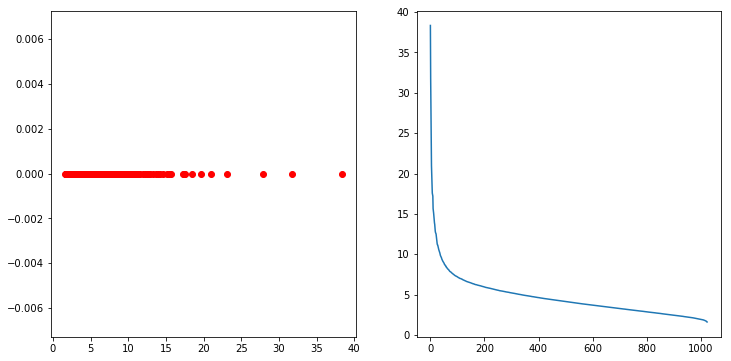

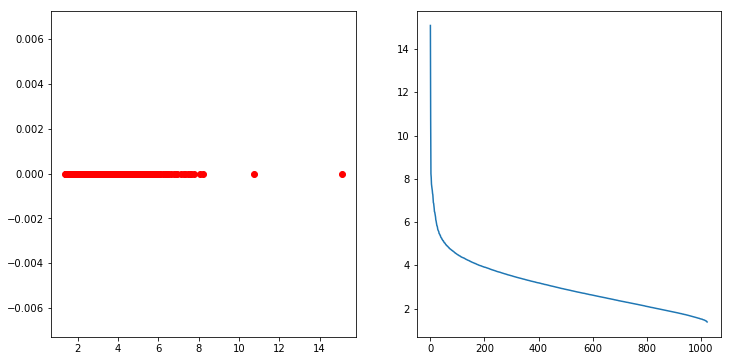

In [ ]:
# fully trainable 2 layer lstm
# 2048*4096 (I: 1024*4096, H:1024*4096)
ckpt_path = "/cns/oz-d/home/zhifengc/brain/rs=6.3/lm1b_16k2l_4x4_000/train/ckpt-00635500"
w0 = tf.train.load_variable(ckpt_path, "1bwds_lm/lm/rnns_0/wm/var")
w1 = tf.train.load_variable(ckpt_path, "1bwds_lm/lm/rnns_1/wm/var")

w0res = w0[1024:,:]
w1res = w1[1024:,:]

_, w0singual_vals, _ = np.linalg.svd(w0res)
_, w1singual_vals, _ = np.linalg.svd(w1res)

plot_eigvals(w0singual_vals)
plot_eigvals(w1singual_vals)

1bwds_lm/lm/rnns_0/scale1/var/Adam_1
1bwds_lm/lm/rnns_1/fcn/w/var/Adam
1bwds_lm/lm/rnns_1/fc1/w/var/Adam
1bwds_lm/lm/rnns_1/fcn/w/var/Adam_1
1bwds_lm/lm/rnns_0/fc1/w/var
1bwds_lm/lm/rnns_0/scale1/var/Adam
1bwds_lm/lm/rnns_0/fc1/w/var/Adam
1bwds_lm/lm/rnns_1/fcn/b/var
1bwds_lm/lm/rnns_1/scale0/var
1bwds_lm/lm/rnns_1/scale1/var/Adam
1bwds_lm/lm/rnns_1/radius0/var/Adam
1bwds_lm/lm/rnns_1/wrlap_chain_comp1/var
1bwds_lm/lm/rnns_0/scale1/var
1bwds_lm/gradient_norm_tracker/log_mean_squared/var
1bwds_lm/lm/softmax/weight_0/var
1bwds_lm/lm/rnns_1/scale1/var/Adam_1
1bwds_lm/lm/rnns_0/scale0/var/Adam_1
1bwds_lm/lm/rnns_0/wrlap_chain0/var
1bwds_lm/lm/softmax/weight_0/var/Adam
1bwds_lm/lm/rnns_0/fcn/w/var/Adam_1
1bwds_lm/lm/rnns_0/radius1/var/Adam
1bwds_lm/gradient_norm_tracker/total_rejections/var
1bwds_lm/lm/rnns_1/fcn/b/var/Adam
1bwds_lm/lm/rnns_1/fcn/w/var
1bwds_lm/lm/rnns_1/wrlap_chain0/var
1bwds_lm/lm/softmax/weight_0/var/Adam_1
1bwds_lm/lm/rnns_0/radius1/var/Adam_1
1bwds_lm/lm/softmax/bias_0

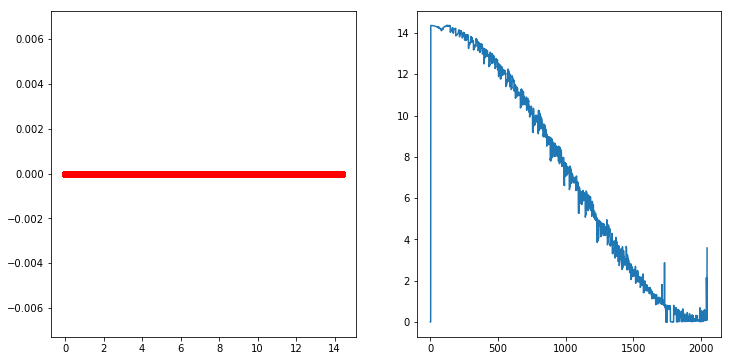

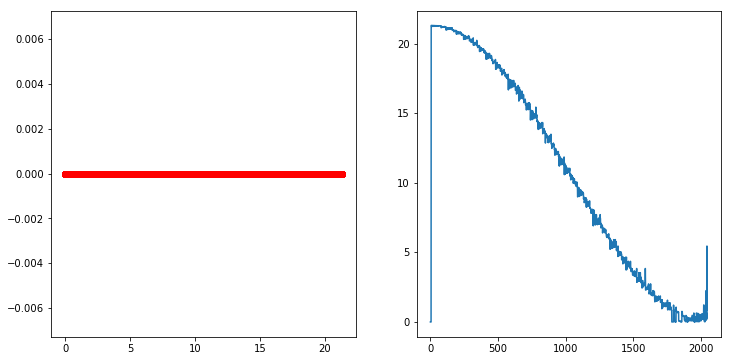

In [ ]:
ckpt_path = "/cns/vz-d/home/harshx/brain/rs=6.3/LM_lap_chainCC_spec_lr_R2048_L2_norm0_r10/train/ckpt-00320100"
def get_all_vars():
  all_vars = tf.train.list_variables(ckpt_path)
  var_names = set([x[0] for x in all_vars])
  for var_name in var_names:
    print(var_name)

get_all_vars()


wrlap = "1bwds_lm/lm/rnns_0/wrlap_chain0/var"
wrlap_comp = "1bwds_lm/lm/rnns_0/wrlap_chain_comp1/var"

scale_lap = "1bwds_lm/lm/rnns_0/scale0/var"
scale_lap_comp = "1bwds_lm/lm/rnns_0/scale1/var"


w1 = tf.train.load_variable(ckpt_path, wrlap)
w2 = tf.train.load_variable(ckpt_path, wrlap_comp)
s1 = tf.train.load_variable(ckpt_path, scale_lap)
s2 = tf.train.load_variable(ckpt_path, scale_lap_comp)

print(s1,s2)

w1 = np.multiply(w1, s1)
w2 = np.multiply(w2, s2)

eigvals,_ = np.linalg.eig(w1)
plot_eigvals(eigvals)

eigvals,_ = np.linalg.eig(w2)
plot_eigvals(eigvals)

In [ ]:
print(w1)

[[ 7.186406  -3.5932024  0.        ...  0.         0.        -3.5932024]
 [-3.5932024  7.186406  -3.5932024 ...  0.         0.         0.       ]
 [ 0.        -3.5932024  7.186406  ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  7.186406  -3.5932024  0.       ]
 [ 0.         0.         0.        ... -3.5932024  7.186406  -3.5932024]
 [-3.5932024  0.         0.        ...  0.        -3.5932024  7.186406 ]]


In [ ]:
def get_eigenvals(layer=0):
  # Set learn=False when matries are not learnt, we don't have mask in them.
  wres = tf.train.load_variable(ckpt_path, "1bwds_lm/lm/rnns_"+str(layer)+"/wr/var")
  print('wres shape: ', wres.shape)
  eigval, eigvec = tf.linalg.eigh(wres)
  sess = tf.compat.v1.Session()
  with sess.as_default():
    result = sess.run([eigval, eigvec])
  print(result[0]) # eigval
  return result

def get_eigval_plots(spectrals):
  eigval, eigvec = spectrals
  plt.plot(eigval)
  plt.ylabel('Eigen values')
  plt.show()
  return

def get_svd_values(layer=0):
  # get the Win weight
  win = tf.train.load_variable(ckpt_path, "1bwds_lm/lm/rnns_"+str(layer)+"/win/var")#win
  print('win shape: ', win.shape)
  sigma, U, V = tf.linalg.svd(win)
  sess = tf.compat.v1.Session()
  with sess.as_default():
    result = sess.run([sigma, U, V])
  print(result[0]) # eigval
  return result

def get_svd_plots(svds):
  sigma, U, V = svds
  plt.plot(sigma)
  plt.ylabel('Singluar values')
  plt.show()
  return

def plots_win_wres(total_layers=1): # TODO: multiply by the scaling params
  collect_eigs = []
  collect_svds = []
  for layer in range(total_layers):
    print('RNN Layer = ', layer)
    # get the eigvals plot for Wres
    spectrals = get_spectral_values(layer)
    get_spectral_plots(spectrals)
    # get the singular vals plot for Win
    svds = get_svd_values(layer)
    get_svd_plots(svds)
    # collect the data
    collect_spectrals.append(spectrals)
    collect_svds.append(svds)
  return collect_spectrals, collect_svds

beta1_power
1bwds_lm/lm/rnns_0/win/var/Adam_1
1bwds_lm/lm/rnns_1/fcn/w/var
1bwds_lm/lm/emb/wm/var
1bwds_lm/gradient_norm_tracker/total_weight/var
1bwds_lm/lm/rnns_1/scale/var
1bwds_lm/lm/rnns_1/win_mask/var
1bwds_lm/lm/rnns_0/fcn/b/var
1bwds_lm/gradient_norm_tracker/log_mean_squared/var
1bwds_lm/lm/rnns_0/win_mask/var
1bwds_lm/lm/rnns_0/fcn/w/var
1bwds_lm/lm/rnns_1/fcn/b/var
1bwds_lm/lm/rnns_0/wr_mask/var
1bwds_lm/lm/rnns_1/fc1/w/var/Adam
1bwds_lm/lm/softmax/weight_0/var/Adam_1
1bwds_lm/lm/emb/wm/var/Adam
1bwds_lm/lm/rnns_0/wr/var/Adam
1bwds_lm/lm/rnns_1/fcn/w/var/Adam_1
1bwds_lm/lm/rnns_0/fcn/w/var/Adam_1
1bwds_lm/lm/rnns_1/radius/var
1bwds_lm/lm/rnns_0/fc1/b/var
1bwds_lm/lm/rnns_1/radius/var/Adam
1bwds_lm/lm/rnns_1/scale/var/Adam
1bwds_lm/lm/rnns_1/wr/var/Adam_1
beta2_power
1bwds_lm/lm/rnns_0/fcn/w/var/Adam
1bwds_lm/lm/rnns_1/fcn/b/var/Adam_1
1bwds_lm/lm/softmax/bias_0/var/Adam_1
1bwds_lm/lm/rnns_0/win/var/Adam
1bwds_lm/lm/rnns_1/fc1/w/var
1bwds_lm/lm/rnns_0/fc1/b/var/Adam_1
1bwds_lm

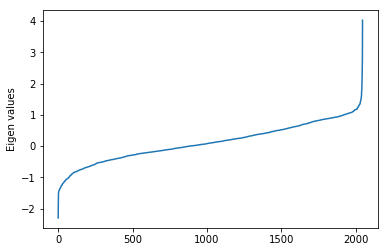

win shape:  (1024, 2048)
[4.900581   4.563137   4.318049   ... 0.11656784 0.10631399 0.09192577]


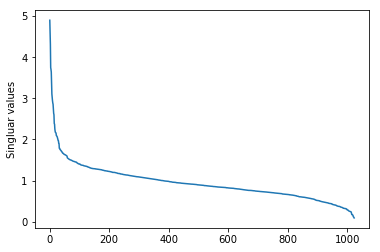

RNN Layer =  1
wres shape:  (2048, 2048)
[-1.5535637 -1.5014833 -1.4846182 ...  2.5257375  2.7184782  2.9115112]


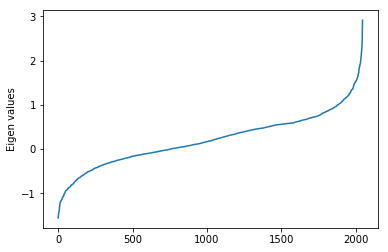

win shape:  (2048, 2048)
[3.5012882e+00 3.4915886e+00 3.4194536e+00 ... 2.0888403e-05 1.6151631e-05
 0.0000000e+00]


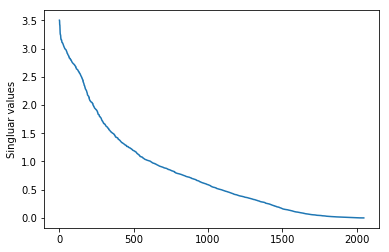

In [ ]:
# Load a checkpoint and visualize the spectrum distribution of the RNN reservoir
# and the input projection weight.
ckpt_base_dir = "/cns/vz-d/home/harshx/brain/rs=6.3/"
exp_name="LM_esn_iscrbd_lr_rscrbd_lr_tanh_L2_norm0_r12"
exp_link='https://mldash.corp.google.com/compare?eidstrs=2031011376300132174,964032932985645960&tag=log_pplx&tag=log_pplx_per_word&runsRegex=&numToShow=10'
ckpt="ckpt-00157200"
# change two variables above to investigate topology of different experiments.

ckpt_path = os.path.join(ckpt_base_dir, exp_name, "train", ckpt)

def get_all_vars():
  all_vars = tf.train.list_variables(ckpt_path)
  var_names = set([x[0] for x in all_vars])
  for var_name in var_names:
    print(var_name)

get_all_vars()
all_spectrals, all_svds = plots_win_wres(total_layers=2)

Fully trainable baselines

In [ ]:
def get_spectral_values(layer=0):
  # Set learn=False when matries are not learnt, we don't have mask in them.
  wres = tf.train.load_variable(ckpt_path, "1bwds_lm/lm/rnns_"+str(layer)+"/wm/var")
  print('wres shape: ', wres.shape)
  eigval, eigvec = tf.linalg.eigh(wres)
  sess = tf.compat.v1.Session()
  with sess.as_default():
    result = sess.run([eigval, eigvec])
  print(result[0]) # eigval
  return result

def get_spectral_plots(spectrals):
  eigval, eigvec = spectrals
  plt.plot(eigval)
  plt.ylabel('Eigen values')
  plt.show()
  return

def get_svd_values(layer=0):
  # get the Win weight
  win = tf.train.load_variable(ckpt_path, "1bwds_lm/lm/rnns_"+str(layer)+"/wm/var")#win
  print('win shape: ', win.shape)
  sigma, U, V = tf.linalg.svd(win)
  sess = tf.compat.v1.Session()
  with sess.as_default():
    result = sess.run([sigma, U, V])
  print(result[0]) # eigval
  return result

def get_svd_plots(svds):
  sigma, U, V = svds
  plt.plot(sigma)
  plt.ylabel('Singluar values')
  plt.show()
  return

def plots_win_wres(total_layers=1): # TODO: multiply by the scaling params
  collect_spectrals = []
  collect_svds = []
  for layer in range(total_layers):
    print('RNN Layer = ', layer)
    # get the eigvals plot for Wres
    # spectrals = get_spectral_values(layer)
    # get_spectral_plots(spectrals)
    # get the singular vals plot for Win
    svds = get_svd_values(layer)
    get_svd_plots(svds)
    # collect the data
    collect_spectrals.append(spectrals)
    collect_svds.append(svds)
  return collect_spectrals, collect_svds

beta1_power
1bwds_lm/lm/emb/wm/var
1bwds_lm/gradient_norm_tracker/total_weight/var
1bwds_lm/lm/rnns_0/b/var/Adam
1bwds_lm/gradient_norm_tracker/log_mean_squared/var
1bwds_lm/lm/rnns_1/wm/var/Adam
total_nan_gradients/var
1bwds_lm/lm/rnns_0/b/var/Adam_1
1bwds_lm/lm/rnns_0/wm/var
1bwds_lm/lm/rnns_1/wm/var
total_samples/var
1bwds_lm/lm/rnns_0/wm/var/Adam
1bwds_lm/lm/rnns_1/b/var
1bwds_lm/lm/softmax/weight_0/var/Adam_1
1bwds_lm/lm/emb/wm/var/Adam
beta2_power
1bwds_lm/lm/rnns_0/b/var
1bwds_lm/lm/softmax/bias_0/var/Adam_1
1bwds_lm/lm/softmax/bias_0/var
1bwds_lm/lm/rnns_0/wm/var/Adam_1
1bwds_lm/lm/softmax/weight_0/var/Adam
global_step
1bwds_lm/lm/rnns_1/b/var/Adam
1bwds_lm/gradient_norm_tracker/log_mean/var
1bwds_lm/lm/rnns_1/b/var/Adam_1
1bwds_lm/lm/emb/wm/var/Adam_1
1bwds_lm/lm/softmax/bias_0/var/Adam
1bwds_lm/lm/rnns_1/wm/var/Adam_1
1bwds_lm/gradient_norm_tracker/total_rejections/var
1bwds_lm/lm/softmax/weight_0/var
RNN Layer =  0
win shape:  (2048, 4096)
[56.02855    44.722233   33.25193  

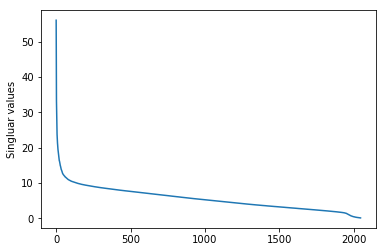

RNN Layer =  1
win shape:  (2048, 4096)
[49.9594     37.980328   32.376377   ...  0.99484473  0.98777646
  0.9711299 ]


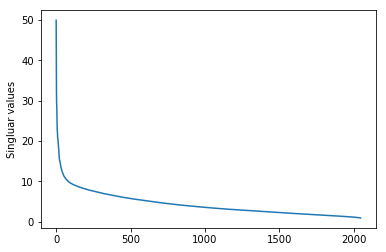

In [ ]:
# Load a checkpoint and visualize the spectrum distribution of the RNN reservoir
# and the input projection weight.
ckpt_base_dir = "/cns/oz-d/home/zhifengc/brain/rs=6.3/"
exp_name="lm1b_16k2l_4x4_000"
exp_link='https://mldash.corp.google.com/compare?eidstrs=3690201184135139955,6143245372198576159,2979878568030552969,719028322763529913&tag=log_pplx&tag=log_pplx_per_word&runsRegex=test&numToShow=10'
ckpt="ckpt-00635500"
# change two variables above to investigate topology of different experiments.
# NOTE: THIS MODEL DOES NOT HAVE WRes ?????????
model_analysis_link = 'https://cnsviewer.corp.google.com/cns/oz-d/home/zhifengc/brain/rs=6.3/lm1b_16k2l_4x4_000/train/model_analysis.txt'
ckpt_path = os.path.join(ckpt_base_dir, exp_name, "train", ckpt)

def get_all_vars():
  all_vars = tf.train.list_variables(ckpt_path)
  var_names = set([x[0] for x in all_vars])
  for var_name in var_names:
    print(var_name)

get_all_vars()
all_spectrals, all_svds = plots_win_wres(total_layers=2)
#/cns/oz-d/home/zhifengc/brain/rs=6.3/lm1b_16k2l_4x4_000/train/

## Plotting the ensemble learning function

In [ ]:
# Load a checkpoint and visualize the ensemble NN
ckpt_base_dir = "/cns/vz-d/home/harshx/brain/rs=6.3/"
exp_name="MT_DEC_lapchain_grid_sw_scale_L6_n0_r19"
exp_link='https://mldash.corp.google.com/experiments/1743033048700044183#scalars'
ckpt="ckpt-00300000"
# change two variables above to investigate topology of different experiments.
model_analysis_link = 'https://cnsviewer.corp.google.com/cns/vz-d/home/harshx/brain/rs=6.3/MT_DEC_lapchain_grid_sw_scale_L6_n0_r19/train/model_analysis.txt'
ckpt_path = os.path.join(ckpt_base_dir, exp_name, "train", ckpt)

def get_all_vars():
  all_vars = tf.train.list_variables(ckpt_path)
  var_names = set([x[0] for x in all_vars])
  for var_name in var_names:
    print(var_name)

get_all_vars()


wmt14_en_fr/enc/L1_rnn_bak/b/var/Adam
wmt14_en_fr/enc/L4_rnn_fwd/b/var/Adam
wmt14_en_fr/dec/atten_rnn/b/var/Adam_1
wmt14_en_fr/enc/L2_rnn_fwd/wm/var/Adam_1
wmt14_en_fr/dec/rnn4/radius1/var/Adam_1
wmt14_en_fr/dec/rnn1/fcn/b/var
wmt14_en_fr/dec/rnn3/radius0/var
wmt14_en_fr/enc/L4_rnn_fwd/wm/var/Adam
wmt14_en_fr/dec/rnn2/fcn/w/var
wmt14_en_fr/dec/rnn4/fc1/b/var
wmt14_en_fr/dec/rnn1/fcn/w/var/Adam_1
wmt14_en_fr/dec/rnn3/fcn/b/var/Adam_1
wmt14_en_fr/dec/rnn3/winlap_sw2/var
wmt14_en_fr/dec/rnn5/fcn/w/var/Adam
wmt14_en_fr/dec/rnn2/wrlap_grid1/var
wmt14_en_fr/dec/atten_rnn/b/var/Adam
wmt14_en_fr/enc/L5_rnn_fwd/b/var/Adam_1
wmt14_en_fr/dec/rnn1/scale0/var
wmt14_en_fr/enc/L0_rnn_fwd/b/var
wmt14_en_fr/enc/L5_rnn_fwd/wm/var
wmt14_en_fr/dec/rnn1/fcn/b/var/Adam
wmt14_en_fr/dec/rnn4/radius2/var/Adam_1
wmt14_en_fr/dec/rnn3/scale1/var
wmt14_en_fr/dec/rnn2/radius1/var
wmt14_en_fr/dec/rnn1/scale0/var/Adam_1
wmt14_en_fr/enc/L5_rnn_fwd/b/var/Adam
wmt14_en_fr/enc/L0_rnn_fwd/b/var/Adam
wmt14_en_fr/dec/rnn2/f

In [ ]:
def ensemble_NN(layer_wts):
  hidden_size = 5
  # layer 1
  fc1 = tf.keras.layers.Dense(hidden_size, input_shape=(3,), activation="relu", 
                              use_bias=True)
  # replace the weights of fc1 by layer 1 wt and bias
  fcn = tf.keras.layers.Dense(1, activation=None, use_bias=True)
  model = tf.keras.models.Sequential() 
  model.add(fc1)
  model.add(fcn)
  print(model)
  return model

In [ ]:
# get the ensemble NN weights
fc1_w = tf.train.load_variable(ckpt_path, "wmt14_en_fr/dec/rnn1/fc1/w/var")
fc1_b = tf.train.load_variable(ckpt_path, "wmt14_en_fr/dec/rnn1/fc1/b/var")
fcn_w = tf.train.load_variable(ckpt_path, "wmt14_en_fr/dec/rnn1/fcn/w/var")
fcn_b = tf.train.load_variable(ckpt_path, "wmt14_en_fr/dec/rnn1/fcn/b/var")
# layer_wts = {'fc1': {'w': fc1_w, 'b': fc1_b},
#              'fcn': {'w': fcn_w, 'b': fcn_b}}
# layer_wts = {'fc1': [fc1_w, fc1_b],
#              'fcn': [fcn_w, fcn_b]}
layer_wts = [[fc1_w, fc1_b],
             [fcn_w, fcn_b]]
print(layer_wts)

# initialize the input data
# xval = np.linspace(0, 1, 3) 
# yval = np.linspace(0, 1, 3) 
# zval = np.linspace(0, 1, 3)  #np.array(range(-10, 10, 1))/10.0
xval = np.linspace(-1, 1, 10) 
yval = np.linspace(-1, 1, 10) 
zval = np.linspace(-1, 1, 10)
print(xval)
data_mesh = np.meshgrid(xval, yval, zval)
print('data mesh: ', len(data_mesh), data_mesh[0].shape)
batch_data = []
for d in data_mesh:
  batch_data.append(d.reshape(-1))
batch_data = np.array(batch_data).transpose()
print(batch_data.shape)

[[array([[-0.35756153,  0.3802588 ,  0.24399781,  0.1193878 ,  0.29337597],
       [-0.54114276,  0.2920868 ,  0.5279403 ,  0.15390238,  0.17433779],
       [-1.1524049 ,  1.0744203 ,  1.6502007 ,  0.70113075,  1.2304837 ]],
      dtype=float32), array([ 0.02935856, -0.20181678,  0.23289898, -0.32001194,  0.3507824 ],
      dtype=float32)], [array([[ 0.9693302 ],
       [ 0.61518645],
       [ 0.43421608],
       [-1.7582142 ],
       [ 0.49870777]], dtype=float32), array([-0.03763491], dtype=float32)]]
[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
data mesh:  3 (10, 10, 10)
(1000, 3)


In [ ]:
sess = tf.compat.v1.Session()
# initialize the model
model_ensemble = ensemble_NN(layer_wts)
data = tf.convert_to_tensor(batch_data)  # tf.random.normal([2, 3])
output = model_ensemble(data)
init = tf.compat.v1.global_variables_initializer()
with sess.as_default():
  sess.run(init)
  # update the model weights to the learned ones
  for i, l in enumerate(model_ensemble.layers):
    l.set_weights(layer_wts[i])
  result = sess.run([data, output, model_ensemble.weights])

In [ ]:
# result

In [ ]:
function_output = result[1]
print(function_output.shape)

(1000, 1)


In [ ]:
for inp, out in zip(batch_data, function_output):
  print(inp, out)

[-1. -1. -1.] [1.9790255]
[-1.         -1.         -0.77777778] [1.7307895]
[-1.         -1.         -0.55555556] [1.4825537]
[-1.         -1.         -0.33333333] [1.234318]
[-1.         -1.         -0.11111111] [0.98608226]
[-1.         -1.          0.11111111] [0.74771553]
[-1.         -1.          0.33333333] [0.64063525]
[-1.         -1.          0.55555556] [0.68799853]
[-1.         -1.          0.77777778] [0.73536175]
[-1. -1.  1.] [0.93379664]
[-0.77777778 -1.         -1.        ] [1.9020041]
[-0.77777778 -1.         -0.77777778] [1.6537683]
[-0.77777778 -1.         -0.55555556] [1.4055325]
[-0.77777778 -1.         -0.33333333] [1.1572968]
[-0.77777778 -1.         -0.11111111] [0.90906113]
[-0.77777778 -1.          0.11111111] [0.7032075]
[-0.77777778 -1.          0.33333333] [0.61967117]
[-0.77777778 -1.          0.55555556] [0.66703445]
[-0.77777778 -1.          0.77777778] [0.78894305]
[-0.77777778 -1.          1.        ] [0.99519163]
[-0.55555556 -1.         -1.        ] 